In [2]:
import pandas as pd
import numpy as np

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import streamlit

In [3]:
data = pd.read_csv(r"C:\datasets\nutrients_csvfile.csv")
data

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products
...,...,...,...,...,...,...,...,...,...,...
330,Fruit-flavored soda,12 oz.,346,161,0,0,0,0,42,"Drinks,Alcohol, Beverages"
331,Ginger ale,12 oz.,346,105,0,0,0,0,28,"Drinks,Alcohol, Beverages"
332,Root beer,12 oz.,346,140,0,0,0,0,35,"Drinks,Alcohol, Beverages"
333,Coffee,1 cup,230,3,t,0,0,0,1,"Drinks,Alcohol, Beverages"


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food      335 non-null    object
 1   Measure   335 non-null    object
 2   Grams     335 non-null    object
 3   Calories  334 non-null    object
 4   Protein   335 non-null    object
 5   Fat       335 non-null    object
 6   Sat.Fat   333 non-null    object
 7   Fiber     335 non-null    object
 8   Carbs     335 non-null    object
 9   Category  335 non-null    object
dtypes: object(10)
memory usage: 26.3+ KB


In [16]:
data1 = pd.read_csv(r"C:\datasets\nutrients_csvfile.csv")
data1

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products
...,...,...,...,...,...,...,...,...,...,...
330,Fruit-flavored soda,12 oz.,346,161,0,0,0,0,42,"Drinks,Alcohol, Beverages"
331,Ginger ale,12 oz.,346,105,0,0,0,0,28,"Drinks,Alcohol, Beverages"
332,Root beer,12 oz.,346,140,0,0,0,0,35,"Drinks,Alcohol, Beverages"
333,Coffee,1 cup,230,3,t,0,0,0,1,"Drinks,Alcohol, Beverages"


<Axes: xlabel='Category'>

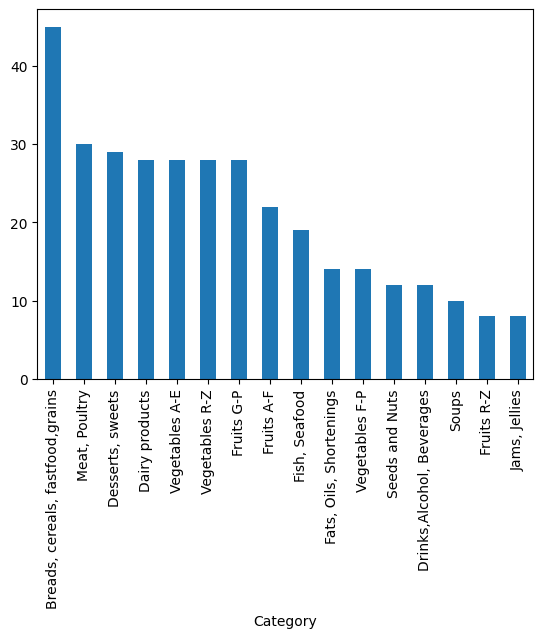

In [4]:
data['Category'].value_counts().plot.bar()

In [17]:
data1.isnull().sum()

Food        0
Measure     0
Grams       0
Calories    1
Protein     0
Fat         0
Sat.Fat     2
Fiber       0
Carbs       0
Category    0
dtype: int64

In [18]:
data1.dropna(inplace = True)

In [15]:
class KnowledgeBase:
    def __init__(self, data_path):
        # Load the dataset
        self.data = pd.read_csv(data_path)
        
    def get_nutritional_info(self, food_name):
        # Retrieve nutritional information for a specific food item
        food_info = self.data[self.data['Food'] == food_name]
        if not food_info.empty:
            return food_info.iloc[0].to_dict()
        else:
            return None

In [24]:
class QLearningAgent:
    def __init__(self, num_actions, learning_rate=0.1, discount_factor=0.9, epsilon=0.1):
        self.num_actions = num_actions
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.q_table = np.zeros((num_actions,))

    def choose_action(self):
        if np.random.uniform(0, 1) < self.epsilon:
            # Explore: choose a random action
            return np.random.choice(self.num_actions)
        else:
            # Exploit: choose the action with the highest Q-value
            return np.argmax(self.q_table)

    def update_q_table(self, action, reward, next_max_q_value):
        # Update Q-value using the Q-learning update rule
        self.q_table[action] += self.learning_rate * (reward + self.discount_factor * next_max_q_value - self.q_table[action])

In [26]:
if __name__ == "__main__":
    # Initialize the knowledge base with the dataset
    knowledge_base = KnowledgeBase(r"C:\datasets\nutrients_csvfile.csv")

    # Initialize the reinforcement learning agent
    num_actions = 2  # Number of diet plans (actions)
    agent = QLearningAgent(num_actions)

    # Simulate episodes (patient interactions)
    num_episodes = 1000
    for episode in range(num_episodes):
        # Choose an action (diet plan)
        action = agent.choose_action()

        # Simulate the environment (blood sugar level)
        # For simplicity, we'll randomly select a food item and use its nutritional values as the environment state
        food_name = knowledge_base.data.sample()['Food'].values[0]
        nutritional_info = data

        # Define rewards based on the nutritional values (e.g., higher rewards for foods low in carbs and sugars)
        if nutritional_info is not None:
            carbs = pd.to_numeric(nutritional_info['Carbs'], errors='coerce')
            fat = pd.to_numeric(nutritional_info['Fat'], errors='coerce')
            # Check if any NaN values exist in carbs or fat
            if not carbs.isna().any() and not fat.isna().any():
                if carbs < 10 and fat < 5:
                    reward = 1  # High reward for low-carb, low-fat foods
                else:
                    reward = -1  # Penalty for foods high in carbs or fats
            else:
                reward = -1  # Penalty if nutritional information is invalid
        else:
            reward = 0   #No reward if nutritional information is not available

        # Update Q-value based on the observed reward
        next_max_q_value = max(agent.q_table)
        agent.update_q_table(action, reward, next_max_q_value)

    # After training, choose the best diet plan based on the learned Q-values
    best_diet_plan = np.argmax(agent.q_table) + 1
    recommended_food_name = knowledge_base.data.sample()['Food'].values[0]
    # Print out the details of the recommended food item
    print("Recommended food item for the best diet plan:")
    print(recommended_food_name)

    #print("Best diet plan:", best_diet_plan)

Recommended food item for the best diet plan:
Cheese


In [36]:
def simulate_SUS_responses(num_evaluations):
    # Generates synthetic SUS responses for a given number of evaluations
    # Each row represents one evaluation's responses to the 10 SUS questions
    return np.random.randint(1, 6, size=(num_evaluations, 10))

def calculate_SUS_score(responses):
    # Calculate the SUS score based on the responses
    scores = []
    for response in responses:
        # Adjust scoring for the SUS
        # Subtract 1 from positives (Q1, Q3, Q5, Q7, Q9)
        # Subtract from 5 for negatives (Q2, Q4, Q6, Q8, Q10) and then subtract 1
        score = 0
        for i in range(10):
            if i % 2 == 0:  # Positive items
                score += (response[i] - 1)
            else:  # Negative items
                score += (5 - response[i])
        # Multiply the sum by 2.5 to convert the score to a 0-100 scale
        scores.append(score * 2.5)
    return np.mean(scores)

def main():
    num_evaluations = 100  # Number of simulated evaluations
    responses = simulate_SUS_responses(num_evaluations)
    
    sus_score = calculate_SUS_score(responses)
    print(f"Average System Usability Scale (SUS) Score: {sus_score:.2f}")

if __name__ == "__main__":
    main()

Average System Usability Scale (SUS) Score: 49.80


In [38]:
def calculate_entropy(data_column):
    # Calculate the frequencies of each unique value in the column
    probabilities = data_column.value_counts(normalize=True)
    # Calculate entropy using the formula for entropy
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def main():
    # Assuming you have a dataset with a column 'Food_Category' loaded into a DataFrame
    # For demonstration, let's create a sample DataFrame
    #data = pd.DataFrame({
     #   'Food_Category': ['Vegetable', 'Fruit', 'Grain', 'Vegetable', 'Fruit', 'Meat', 'Vegetable', 'Fruit', 'Grain', 'Meat']
    #})

    # Calculate the entropy of the 'Food_Category' column
    entropy_value = calculate_entropy(data['Category'])
    print(f"Entropy of the 'Food_Category' column: {entropy_value:.4f}")

if __name__ == "__main__":
    main()


Entropy of the 'Food_Category' column: 3.8318


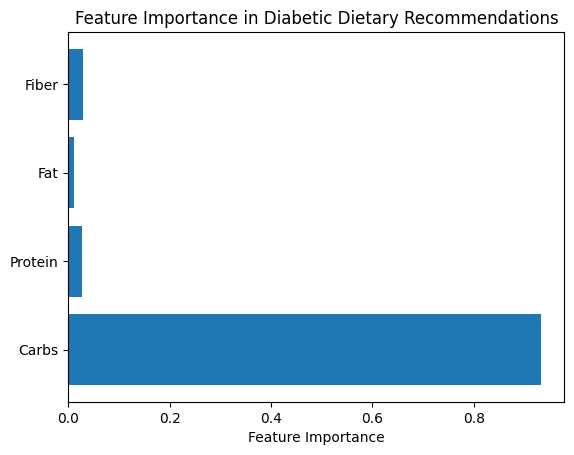

In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Example dataset with nutritional information
data1['Carbs'] = pd.to_numeric(data1['Carbs'], errors='coerce')
data1['Protein'] = pd.to_numeric(data1['Protein'], errors='coerce')
data1['Fat'] = pd.to_numeric(data1['Fat'], errors='coerce')
data1['Fiber'] = pd.to_numeric(data1['Fiber'], errors='coerce')


# Create a binary target variable based on carbs: High carb foods are not suitable for diabetics
carb_threshold = 20  # Define a threshold for high carbs
data1['Is_Suitable'] = data1['Carbs'].apply(lambda x: 'No' if x > carb_threshold else 'Yes')

# Prepare data for machine learning
X = data1[['Carbs', 'Protein', 'Fat', 'Fiber']]  # Features
y = LabelEncoder().fit_transform(data1['Is_Suitable'])  # Encode the target variable

imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Plot feature importances
plt.barh(np.arange(len(feature_importances)), feature_importances, align='center')
plt.yticks(np.arange(len(X.columns)), X.columns)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Diabetic Dietary Recommendations')
plt.show()
